In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import os

In [2]:
from ultralytics import YOLO

# Annotate Synthetic Crater Images

In [3]:
# Load pre-trained model (trained only on real images)
model = YOLO("yolov8n.pt")

In [5]:
# Folder containing synthetic images from stable diffusion control net
synthetic_folder2 = "synthetic_images/stbl_diff_control_net"
output_folder = "synthetic_images_annotated/stbl_diff_control_net"
os.makedirs(output_folder, exist_ok=True)

## Stable Diffusion Images

In [8]:
# Folder containing synthetic images from stable diffusion
synthetic_folder1 = "synthetic_images/stbl_diff"
output_folder = "synthetic_images_annotated/stbl_diff"
os.makedirs(output_folder, exist_ok=True)

In [9]:
# Generate annotations
for image_name in os.listdir(synthetic_folder1):
    image_path = os.path.join(synthetic_folder1, image_name)
    results = model(image_path)  # Inference

    # Save bounding boxes in YOLO format
    label_path = os.path.join(output_folder, image_name.replace(".png", ".txt"))
    with open(label_path, "w") as f:
        for box in results[0].boxes.xywh:  # (x_center, y_center, width, height)
            class_id = 0  # Assuming all craters are class 0
            x_center, y_center, width, height = box.tolist()
            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print(f"✅ Pseudo-labels generated and saved in {output_folder}")


image 1/1 /Users/sudharsangopalakrishnan/Synthetic-Martian-Terrain-Image-Generation/synthetic_images/stbl_diff/stablediffusion_generated_15.png: 640x640 1 sports ball, 269.8ms
Speed: 4.3ms preprocess, 269.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/sudharsangopalakrishnan/Synthetic-Martian-Terrain-Image-Generation/synthetic_images/stbl_diff/stablediffusion_generated_28.png: 640x640 4 sports balls, 150.0ms
Speed: 4.4ms preprocess, 150.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/sudharsangopalakrishnan/Synthetic-Martian-Terrain-Image-Generation/synthetic_images/stbl_diff/stablediffusion_generated_14.png: 640x640 (no detections), 170.2ms
Speed: 3.3ms preprocess, 170.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/sudharsangopalakrishnan/Synthetic-Martian-Terrain-Image-Generation/synthetic_images/stbl_diff/stablediffusion_generated_16.png: 640x640 (no detections), 1

## Stable Diffusion + ControlNet Images

In [ ]:
# Folder containing synthetic images from stable diffusion control net
synthetic_folder2 = "synthetic_images/stbl_diff_control_net"
output_folder = "synthetic_images_annotated/stbl_diff_control_net"
os.makedirs(output_folder, exist_ok=True)

NumPy Version: 1.26.4
Torch Version: 2.2.2
Torch tensor from NumPy: tensor([1, 2, 3])


# Models

[]


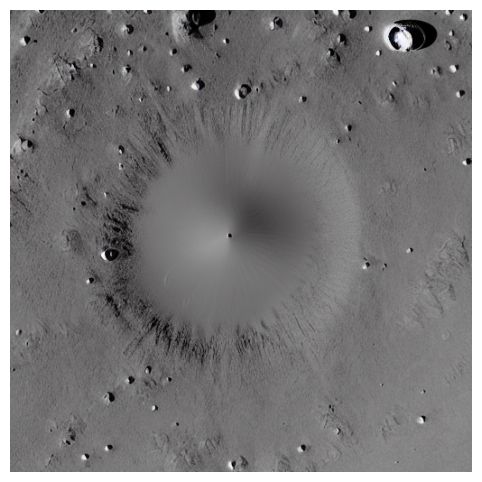

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to read image and annotations
def visualize_yolo_annotations(image_path, annotation_path, class_names):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    # Read annotation file
    with open(annotation_path, "r") as file:
        lines = file.readlines()
    
    h, w, _ = image.shape  # Get image dimensions

    print(lines)
    # Draw bounding boxes
    for line in lines:
        data = line.strip().split()
        class_id = int(data[0])  # First value is class ID
        x_center, y_center, width, height = map(float, data[1:])  # YOLO format values (normalized)

        # Convert to pixel coordinates
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Draw rectangle
        color = (0, 255, 0)  # Green box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add label
        label = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Example usage

image_dir = "synthetic_images/stbl_diff"
annotation_dir = "synthetic_images_annotated/stbl_diff"

image_index = 24
image_list = os.listdir(image_dir)
image_list.sort()

annotation_list = os.listdir(annotation_dir)
annotation_list.sort()

image_path = os.path.join(image_dir, image_list[image_index])
annotation_path = os.path.join(annotation_dir, annotation_list[image_index])
class_names = ["Crater"]  # Modify based on your dataset
visualize_yolo_annotations(image_path, annotation_path, class_names)

In [23]:
image_path

'synthetic_images/stbl_diff/stablediffusion_generated_6.png'

In [24]:
annotation_path

'synthetic_images_annotated/stbl_diff/stablediffusion_generated_6.txt'

In [25]:
annotation_list

['stablediffusion_generated_1.txt',
 'stablediffusion_generated_10.txt',
 'stablediffusion_generated_11.txt',
 'stablediffusion_generated_12.txt',
 'stablediffusion_generated_13.txt',
 'stablediffusion_generated_14.txt',
 'stablediffusion_generated_15.txt',
 'stablediffusion_generated_16.txt',
 'stablediffusion_generated_17.txt',
 'stablediffusion_generated_18.txt',
 'stablediffusion_generated_19.txt',
 'stablediffusion_generated_2.txt',
 'stablediffusion_generated_20.txt',
 'stablediffusion_generated_21.txt',
 'stablediffusion_generated_22.txt',
 'stablediffusion_generated_23.txt',
 'stablediffusion_generated_24.txt',
 'stablediffusion_generated_25.txt',
 'stablediffusion_generated_26.txt',
 'stablediffusion_generated_27.txt',
 'stablediffusion_generated_28.txt',
 'stablediffusion_generated_3.txt',
 'stablediffusion_generated_4.txt',
 'stablediffusion_generated_5.txt',
 'stablediffusion_generated_6.txt',
 'stablediffusion_generated_7.txt',
 'stablediffusion_generated_8.txt',
 'stabled